Gaussian processes can be used to model nonlinear time series. We consider the problem of predicting future concentrations of CO$_2$ in the atmosphere. The data are taken from the Mauna Loa observatory in Hawaii which records the monthly average atmospheric concentration of CO$_2$ (in parts per million) between 1958 to 2015. The purposes of testing the predictive accuracy of the Gaussian process model, we fit the GP to the historical data from 1958 to 2004 and optimise the parameters using maximum likelihood estimation. 

We employ a seemingly complex kernel function to model these data which follows the kernel structure given in Rasmussen and Williams (2006). The kernel comprises of simpler kernels with each kernel term accounting for a different aspect in the variation of the data. For example, the `Periodic` kernel captures the seasonal effect of CO$_2$ absorption from plants. A detailed description of each kernel contribution is given in Chapter 5 of Rasmussen and Williams (2006).


In [1]:
using GaussianProcesses

data = readcsv("data/CO2_data.csv")

year = data[:,1]; co2 = data[:,2];
#Split the data into training and testing data
xtrain = year[year.<2004]; ytrain = co2[year.<2004];
xtest = year[year.>=2004]; ytest = co2[year.>=2004];

#Kernel is represented as a sum of kernels
kernel = SE(4.0,4.0) + Periodic(0.0,1.0,0.0)*SE(4.0,0.0) + RQ(0.0,0.0,-1.0) + SE(-2.0,-2.0);

gp = GP(xtrain,ytrain,MeanZero(),kernel,-2.0)   #Fit the GP

optimize!(gp) #Estimate the parameters through maximum likelihood estimation

μ, Σ = predict_y(gp,xtest);

Over the ten year predidction horizon the GP is able to accurately capture both the trend and seasonal variations of the CO 2 concentrations.
Arguably, the GP prediction gradually begins to underestimate the CO 2 concentration. The accuracy of the
fit could be further improved by extending the kernel function to include additionally terms. Recent work
on automatic structure discovery (Duvenaud et al., 2013) could be used to optimise the modelling process.

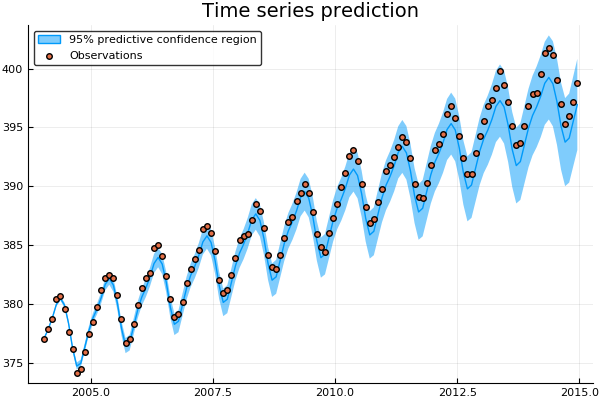

In [3]:
using Plots
pyplot()

plot(xtest,μ,ribbon=Σ, title="Time series prediction",label="95% predictive confidence region")
scatter!(xtest,ytest,label="Observations")